In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob 

In [2]:
bounds = np.asarray([(0.0, 35.0), (0.0, 35.0)]).T 

In [3]:
uvvis_data = pd.read_excel("./tem_samples_uvvis.xlsx", engine='openpyxl')
water_uvvis = pd.read_excel("../uvvis/water.xlsx", engine='openpyxl')
water = water_uvvis.iloc[:,-1].to_numpy()
wavelength = uvvis_data["Wavelength"].to_numpy()
well_names = uvvis_data.columns[1:].to_numpy()
print(well_names)

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'B1' 'B2'
 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B6-2' 'B7-2']


In [4]:
volumes = pd.read_csv("../opentrons/volumes_tem.csv")

In [5]:
sample_info = pd.read_csv("./sample_info.csv")
sample_info

,Unnamed: 0,well_name,label,notes
0,0,A1,sphere,retrosynthesis target
1,1,A2,rod,retrosynthesis target
2,2,A3,seed,NaN
3,3,A4,seed,NaN
4,4,A5,mix-seed-sphere,NaN
5,5,A6,mix-seed-rod,NaN
6,6,A7,rods,NaN
7,7,A8,pd-rods,NaN
8,8,A9,pd-rods,NaN
9,9,A10,md-rods,NaN


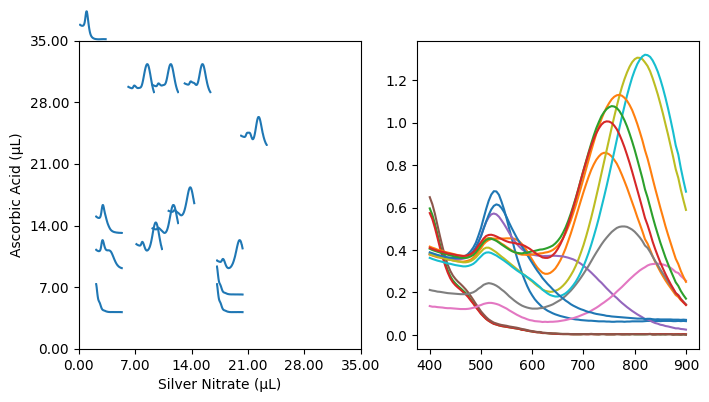

In [6]:
spectra = []
for well_name in well_names[:14]:
    y = uvvis_data[well_name].values-water
    spectra.append(y)

spectra = np.asarray(spectra)
fig, axs = plt.subplots(1,2, figsize=(2*4,4))
comps = np.vstack((volumes['SN'].values, volumes['AA'].values)).T
plot_phasemap(bounds, axs[0], comps, spectra)
axs[0].set_xlabel("Silver Nitrate (µL)")
axs[0].set_ylabel("Ascorbic Acid (µL)")

for si in spectra:
    axs[1].plot(wavelength, si)
plt.show()

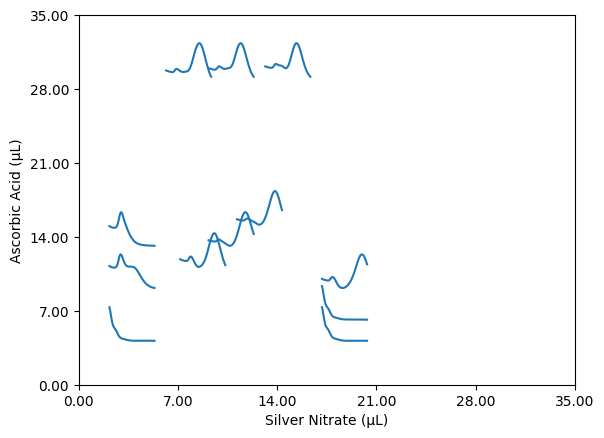

In [7]:
fig, ax = plt.subplots()
plot_phasemap(bounds, ax, comps[2:,:], spectra[2:,:])
ax.set_xlabel("Silver Nitrate (µL)")
ax.set_ylabel("Ascorbic Acid (µL)")
plt.show()

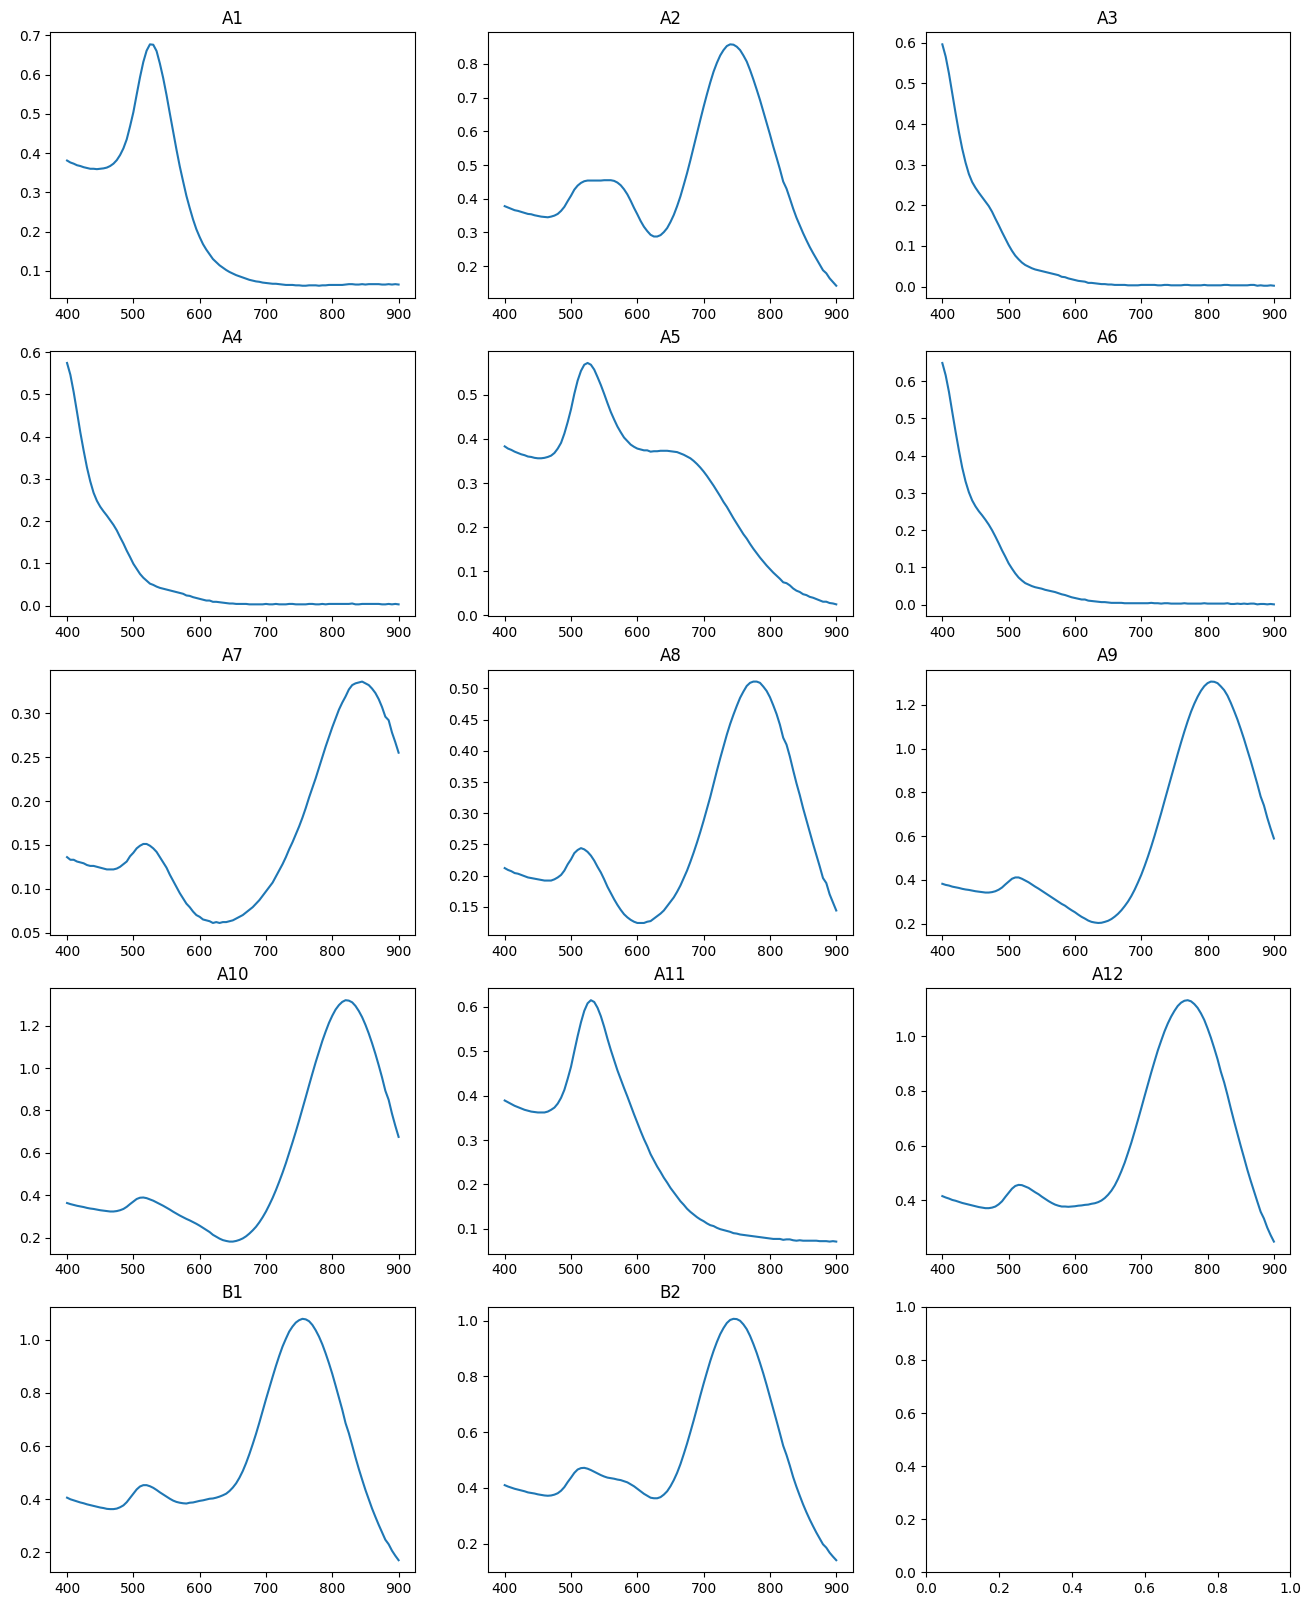

In [8]:
fig, axs = plt.subplots(5, 3, figsize=(4*4,4*5))
axs = axs.flatten()
for i, well_name in enumerate(well_names[:14]):
    y = uvvis_data[well_name].values-water
    axs[i].plot(wavelength, y)
    axs[i].set_title(well_name)
plt.show()

### Repeats

In [30]:
pyplot_style ={"text.usetex": True,
               "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
               "axes.spines.right" : False,
               "axes.spines.top" : False,
               "font.size": 15,
               "savefig.dpi": 600,
               "savefig.bbox": 'tight',
              } 

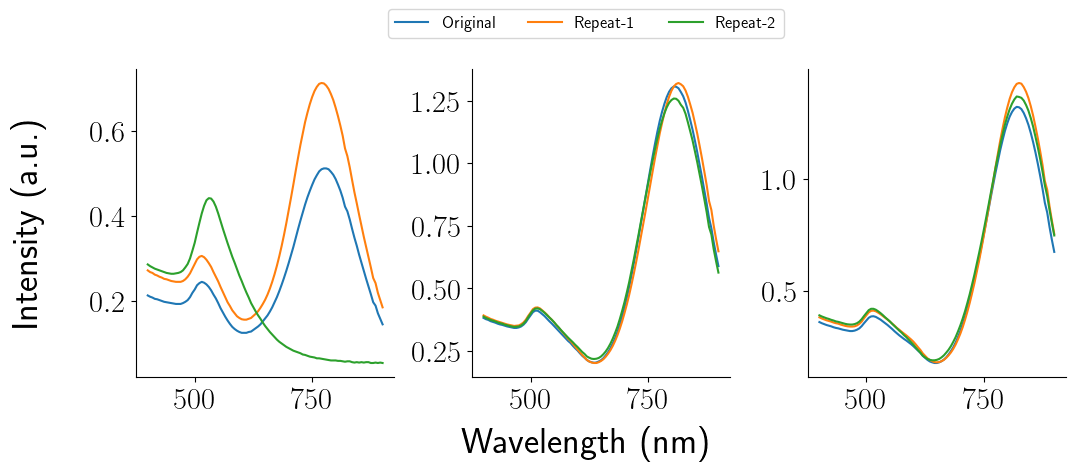

In [10]:
well_names_repeats = [["A8","A9","A10"],["B3","B4","B5"],["B6","B7","B8"]]
labels = ["Original", "Repeat-1", "Repeat-2"]
with plt.style.context(pyplot_style):
    fig, axs = plt.subplots(1,3, figsize=(3*4, 4))
    fig.subplots_adjust(wspace=0.3)
    for i in range(3):
        for j in range(3):
            well_name = well_names_repeats[j][i]
            y = uvvis_data[well_name].values-water
            axs[i].plot(wavelength, y, label=labels[j])
    handles, labels = axs[i].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=3, 
               loc='upper center', 
               bbox_to_anchor=[0.5,1.05], prop={'size': 12}
               )
    fig.supxlabel("Wavelength (nm)", y=-0.1)
    fig.supylabel("Intensity (a.u.)")
    plt.savefig("../paper/figures/same_batch_noise_uvvis.png")
    plt.show()

### Comapre before and after centrifuge

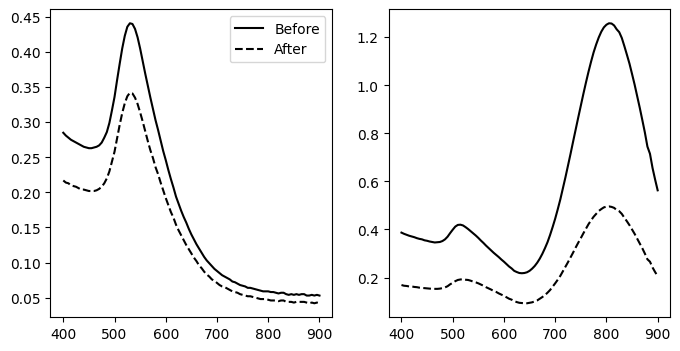

In [11]:
centrifuge_compare_wells = ["B6", "B7", "B6-2", "B7-2"]
fig, axs = plt.subplots(1,2, figsize=(4*2, 4))

y_b6_before = uvvis_data["B6"].values-water
y_b6_after = uvvis_data["B6-2"].values-water
axs[0].plot(wavelength, y_b6_before, color="k", label="Before")
axs[0].plot(wavelength, y_b6_after, color="k", ls="--", label="After")
axs[0].legend()

y_b7_before = uvvis_data["B7"].values-water
y_b7_after = uvvis_data["B7-2"].values-water
axs[1].plot(wavelength, y_b7_before, color="k")
axs[1].plot(wavelength, y_b7_after, color="k", ls="--")
plt.show()

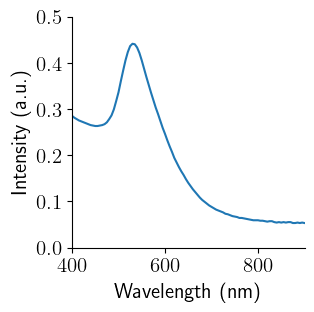

In [31]:
with plt.style.context(pyplot_style):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.plot(wavelength, y_b6_before)
    ax.set_xlim([400, 900])
    ax.set_ylim([0.0, 0.5])
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity (a.u.)")
    plt.savefig("./uvvis_sphere.png")
    plt.show()

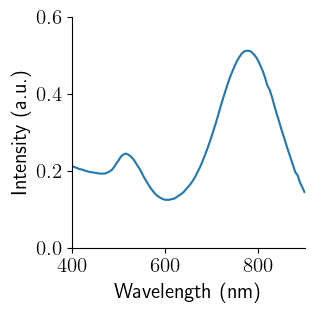

In [32]:
with plt.style.context(pyplot_style):
    fig, ax = plt.subplots(figsize=(3, 3))
    y = uvvis_data["A8"].values-water
    ax.plot(wavelength, y)
    ax.set_xlim([400, 900])
    ax.set_ylim([0.0, 0.6])
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity (a.u.)")

    plt.savefig("./uvvis_rod.png")
    plt.show()